In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install imbalanced-learn

In [2]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import pandas as pd
import math

def categorical_probas_to_classes(p):
    return np.argmax(p, axis=1)

def to_categorical(y, nb_classes=None):
    '''Convert class vector (integers from 0 to nb_classes)
    to binary class matrix, for use with categorical_crossentropy.
    '''
    y = np.array(y, dtype='int')
    if not nb_classes:
        nb_classes = np.max(y)+1
    Y = np.zeros((len(y), nb_classes))
    for i in range(len(y)):
        Y[i, y[i]] = 1.
    return Y


def calculate_performace(test_num, pred_y, labels):
    tp = 0
    fp = 0
    tn = 0
    fn = 0
    for index in range(test_num):
        if labels[index] == 1:
            if labels[index] == pred_y[index]:
                tp = tp + 1
            else:
                fn = fn + 1
        else:
            if labels[index] == pred_y[index]:
                tn = tn + 1
            else:
                fp = fp + 1

    acc = float(tp + tn) / test_num
    precision = float(tp) / (tp + fp + 1e-06)
    npv = float(tn) / (tn + fn + 1e-06)
    sensitivity = float(tp) / (tp + fn + 1e-06)
    specificity = float(tn) / (tn + fp + 1e-06)
    mcc = float(tp * tn - fp * fn) / (math.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn)) + 1e-06)
    f1 = float(tp * 2) / (tp * 2 + fp + fn + 1e-06)
    return acc, precision, npv, sensitivity, specificity, mcc, f1

(816, 277)
(204, 277)
(816,)
(204,)
Epoch 1/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 12s 76ms/step - accuracy: 0.4914 - loss: 0.7044 - val_accuracy: 0.5000 - val_loss: 0.6944
Epoch 2/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.5275 - loss: 0.6934 - val_accuracy: 0.5000 - val_loss: 0.6881
Epoch 3/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5660 - loss: 0.6853 - val_accuracy: 0.5600 - val_loss: 0.6830
Epoch 4/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5192 - loss: 0.6938 - val_accuracy: 0.7750 - val_loss: 0.6757
Epoch 5/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6154 - loss: 0.6766 - val_accuracy: 0.8200 - val_loss: 0.6647
Epoch 6/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6464 - loss: 0.6643 - val_accuracy: 0.8450 - val_loss: 0.6480
Epoch 7/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6718 - loss: 0.6521 - val_accuracy: 0.8700 - val_loss: 0.6240
Epoch 8/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7698 - loss:

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ bidirectional_6 (Bidirectional)      │ (None, 1, 64)               │          59,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 1, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_7 (Bidirectional)      │ (None, 1, 32)               │           7,872 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 1, 32)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense_64 (Dense)                     │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense_16 (Dense)                     │ (None, 16)                  │           1,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense_2 (Dense)                      │ (None, 2)                   │              34 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 212,312 (829.35 KB)

 Trainable params: 70,770 (276.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 141,542 (552.90 KB)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 125ms/step
Saved model to disk
Epoch 1/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9563 - loss: 0.2055 - val_accuracy: 0.9749 - val_loss: 0.1271
Epoch 2/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9569 - loss: 0.1902 - val_accuracy: 0.9698 - val_loss: 0.1234
Epoch 3/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9518 - loss: 0.1754 - val_accuracy: 0.9749 - val_loss: 0.1195
Epoch 4/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9465 - loss: 0.1907 - val_accuracy: 0.9698 - val_loss: 0.1173
Epoch 5/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9432 - loss: 0.1740 - val_accuracy: 0.9698 - val_loss: 0.1145
Epoch 6/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9547 - loss: 0.1531 - val_accuracy: 0.9698 - val_loss: 0.1130
Epoch 7/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9629 - loss: 0.1573 - val_accuracy: 0.9698 - val_loss: 0.1115
Epoch 8/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step -

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ bidirectional_6 (Bidirectional)      │ (None, 1, 64)               │          59,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 1, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_7 (Bidirectional)      │ (None, 1, 32)               │           7,872 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 1, 32)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense_64 (Dense)                     │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense_16 (Dense)                     │ (None, 16)                  │           1,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense_2 (Dense)                      │ (None, 2)                   │              34 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 212,312 (829.35 KB)

 Trainable params: 70,770 (276.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 141,542 (552.90 KB)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Saved model to disk
Epoch 1/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9686 - loss: 0.1070 - val_accuracy: 1.0000 - val_loss: 0.0191
Epoch 2/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9685 - loss: 0.1239 - val_accuracy: 1.0000 - val_loss: 0.0186
Epoch 3/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9643 - loss: 0.1293 - val_accuracy: 1.0000 - val_loss: 0.0179
Epoch 4/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9812 - loss: 0.0874 - val_accuracy: 1.0000 - val_loss: 0.0172
Epoch 5/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9708 - loss: 0.1130 - val_accuracy: 1.0000 - val_loss: 0.0166
Epoch 6/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9708 - loss: 0.1198 - val_accuracy: 1.0000 - val_loss: 0.0161
Epoch 7/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9762 - loss: 0.0836 - val_accuracy: 1.0000 - val_loss: 0.0154
Epoch 8/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accurac

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ bidirectional_6 (Bidirectional)      │ (None, 1, 64)               │          59,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 1, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_7 (Bidirectional)      │ (None, 1, 32)               │           7,872 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 1, 32)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense_64 (Dense)                     │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense_16 (Dense)                     │ (None, 16)                  │           1,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense_2 (Dense)                      │ (None, 2)                   │              34 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 212,312 (829.35 KB)

 Trainable params: 70,770 (276.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 141,542 (552.90 KB)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Saved model to disk
Epoch 1/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9842 - loss: 0.0727 - val_accuracy: 1.0000 - val_loss: 0.0158
Epoch 2/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9843 - loss: 0.0679 - val_accuracy: 1.0000 - val_loss: 0.0147
Epoch 3/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9804 - loss: 0.0707 - val_accuracy: 0.9950 - val_loss: 0.0161
Epoch 4/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9812 - loss: 0.0837 - val_accuracy: 0.9950 - val_loss: 0.0192
Epoch 5/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9665 - loss: 0.1041 - val_accuracy: 0.9950 - val_loss: 0.0201
Epoch 6/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9805 - loss: 0.0836 - val_accuracy: 0.9950 - val_loss: 0.0212
Epoch 7/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9842 - loss: 0.0603 - val_accuracy: 0.9950 - val_loss: 0.0210
Epoch 8/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - 

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ bidirectional_6 (Bidirectional)      │ (None, 1, 64)               │          59,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 1, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_7 (Bidirectional)      │ (None, 1, 32)               │           7,872 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 1, 32)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense_64 (Dense)                     │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense_16 (Dense)                     │ (None, 16)                  │           1,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense_2 (Dense)                      │ (None, 2)                   │              34 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 212,312 (829.35 KB)

 Trainable params: 70,770 (276.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 141,542 (552.90 KB)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Saved model to disk
Epoch 1/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9787 - loss: 0.0563 - val_accuracy: 0.9899 - val_loss: 0.0404
Epoch 2/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9801 - loss: 0.0590 - val_accuracy: 0.9899 - val_loss: 0.0409
Epoch 3/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9802 - loss: 0.0666 - val_accuracy: 0.9899 - val_loss: 0.0425
Epoch 4/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9898 - loss: 0.0474 - val_accuracy: 0.9899 - val_loss: 0.0430
Epoch 5/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9889 - loss: 0.0508 - val_accuracy: 0.9899 - val_loss: 0.0434
Epoch 6/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9871 - loss: 0.0399 - val_accuracy: 0.9899 - val_loss: 0.0447
Epoch 7/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9866 - loss: 0.0456 - val_accuracy: 0.9899 - val_loss: 0.0480
Epoch 8/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accu

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ bidirectional_6 (Bidirectional)      │ (None, 1, 64)               │          59,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 1, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_7 (Bidirectional)      │ (None, 1, 32)               │           7,872 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 1, 32)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense_64 (Dense)                     │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense_16 (Dense)                     │ (None, 16)                  │           1,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense_2 (Dense)                      │ (None, 2)                   │              34 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 212,312 (829.35 KB)

 Trainable params: 70,770 (276.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 141,542 (552.90 KB)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Saved model to disk


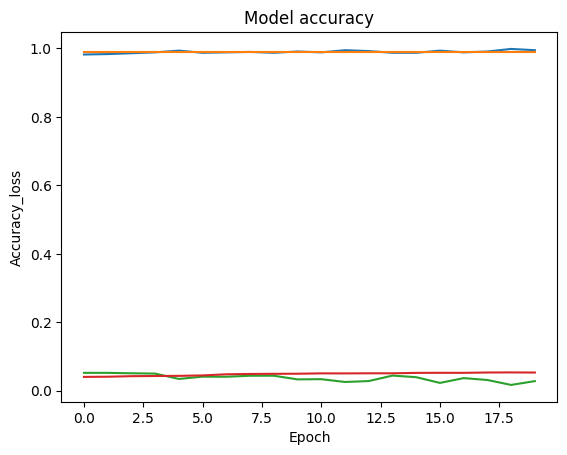

In [7]:
from keras.layers import Dense, Dropout
import pandas as pd
import numpy as np
from keras.layers import Flatten
from keras.layers import GRU,Bidirectional
from keras.layers import Conv1D, MaxPooling1D
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold, train_test_split
from tensorflow.keras.models import Sequential, model_from_json


model = Sequential()
#model.add(Conv1D(filters=64, kernel_size=3, padding='same', activation='relu'))
#model.add(MaxPooling1D(pool_size=2, strides=1, padding="SAME"))
#model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
#model.add(MaxPooling1D(pool_size=2, strides=1, padding="SAME"))
model.add(Bidirectional(GRU(32, return_sequences=True)))
model.add(Dropout(0.5))
model.add(Bidirectional(GRU(16, return_sequences=True)))
model.add(Dropout(0.5))
model.add(Flatten())
# model.add(Dense(256, activation = 'sigmoid',name="Dense_256"))
# model.add(Dropout(0.7))
model.add(Dense(64, activation = 'sigmoid',name="Dense_64"))
model.add(Dropout(0.7))
model.add(Dense(16, activation = 'sigmoid',name="Dense_16"))
# model.add(Dropout(0.7))
model.add(Dense(2, activation='sigmoid', name="Dense_2"))
model.compile(loss='categorical_crossentropy', optimizer='adamax', metrics=['accuracy'])


#model.add(Dense(2, activation='sigmoid', name="Dense_2"))
#model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])  # rmsprop
###########################
#Load data
path = "/content/drive/MyDrive/Watashara_Projects/ACE (Peptide)/"
data_ = pd.read_csv(path + 'EN_All_clean.csv',header = None)

data_np = np.array(data_)
data = data_np[:, :]
# minmax = MinMaxScaler()
# data = minmax.fit(data_np)

label1=np.ones((394,1))#Value can be changed
label2=np.zeros((626,1))
labels=np.append(label1,label2)


# y = labels


X_train, X_ind, y_train, y_ind = train_test_split(data, labels, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_ind.shape)
print(y_train.shape)
print(y_ind.shape)

# X = np.array(X_train,dtype=float)
# y = y_train


from imblearn.over_sampling import SMOTE, BorderlineSMOTE
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)

X = np.array(X_train,dtype=float)
y = y_train

[m1,n1] = np.shape(X)
X = np.reshape(X, (-1, 1, n1))
sepscores = []
ytest = np.ones((1, 2)) * 0.5
yscore = np.ones((1, 2)) * 0.5

# [sample_num, input_dim] = np.shape(shu)
# X = np.reshape(shu, (-1, 1, input_dim))
# out_dim = 2
skf = StratifiedKFold(n_splits=5)

folder_name = "Update_results/BiGRU_wSMOTE"

for train, test in skf.split(X, y):
    y_train = to_categorical(y[train])
    y_test = to_categorical(y[test])
    cv_clf = model
    #cv_clf=get_CNN_model(input_dim,out_dim)
    # hist=cv_clf.fit(X[train],y_train,epochs=5)
    history = cv_clf.fit(X[train], y_train, validation_data=(X[test], y_test), batch_size=28, epochs=20)
    cv_clf.summary()
    y_score = cv_clf.predict(X[test])
    y_class = categorical_probas_to_classes(y_score)

    y_test = to_categorical(y[test])
    ytest = np.vstack((ytest, y_test))
    y_test_tmp = y[test]
    yscore = np.vstack((yscore, y_score))

    acc, precision, npv, sensitivity, specificity, mcc, f1 = calculate_performace(len(y_class), y_class,
                                                                                        y_test_tmp)
    fpr, tpr, _ = roc_curve(y_test[:, 1], y_score[:, 1])
    roc_auc = auc(fpr, tpr)
    sepscores.append([acc, precision, npv, sensitivity, specificity, mcc, f1, roc_auc])
    # serialize model to JSON
    # model_json = model.to_json()
    # with open(path+f"{folder_name}/model.json", "w") as json_file:
    #     json_file.write(model_json)
    # # serialize weights to HDF5
    model.save(path+f"{folder_name}/BiGRU_model.keras")
    print("Saved model to disk")

# later...
scores = np.array(sepscores)
result1 = np.mean(scores, axis=0)
H1 = result1.tolist()
sepscores.append(H1)
result = sepscores

row = yscore.shape[0]
yscore = yscore[np.array(range(1, row)), :]
yscore_sum = pd.DataFrame(data=yscore)
yscore_sum.to_csv(path+f'{folder_name}/BiGRU_yscore.csv')

ytest = ytest[np.array(range(1, row)), :]
ytest_sum = pd.DataFrame(data=ytest)
ytest_sum.to_csv(path+f'{folder_name}/BiGRU_ytest.csv')

data_csv = pd.DataFrame(data=result)
data_csv.to_csv(path+f'{folder_name}/BiGRU_CNN_CV_results.csv')
print(history)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model accuracy')
plt.ylabel('Accuracy_loss')
plt.xlabel('Epoch')
plt.show()

**Indpendent data test **

In [6]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import scale
from sklearn.metrics import roc_curve, auc
from tensorflow.keras.models import Sequential, model_from_json,load_model
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import pandas as pd
import math

# path = '/content/drive/MyDrive/QSAR/Update_2/Other_classifiers/'
# #########################################################################################
# data_t = pd.read_csv(path+'data/X_test_rfe_EN.csv', header=None)
# dataTest = np.array(data_t)
# [m1, n1] = np.shape(dataTest)
# # label1 = np.ones((int(m1 / 2), 1))
# # label2 = np.zeros((int(m1 / 2), 1))
# # label = np.append(label1, label2)
# label = pd.read_csv(path+'data/y_test_rfe_EN.csv',header=None).values
# # shu = scale(dataTest)
Xt = X_ind
yt = y_ind
###########################################################################################
[sample_num, input_dim] = np.shape(Xt)
Xt = np.reshape(Xt, (-1, 1, input_dim))

sepscores = []
ytest = np.ones((1, 2)) * 0.5
yscore = np.ones((1, 2)) * 0.5

# load json and create model
# json_file = open(path+f'{folder_name}/model.json', 'r')
# loaded_model_json = json_file.read()
# json_file.close()
# loaded_model = model_from_json(loaded_model_json)
# load weights into new model
model = load_model(path+f"{folder_name}/BiGRU_model.keras")
print("Loaded model from disk")

# evaluate loaded model on test data
# model.compile(loss='binary_crossentropy', optimizer='adamax', metrics=['accuracy'])
#score = loaded_model.evaluate(Xt, yt, verbose=0)
#print(score)
y_score = model.predict(Xt)
y_class = categorical_probas_to_classes(y_score)

y_test = to_categorical(yt)
ytest = np.vstack((ytest, y_test))
y_test_tmp = yt
yscore = np.vstack((yscore, y_score))

acc, precision, npv, sensitivity, specificity, mcc, f1 = calculate_performace(len(y_class), y_class,
                                                                                    y_test_tmp)
fpr, tpr, _ = roc_curve(y_test[:, 1], y_score[:, 1])
roc_auc = auc(fpr, tpr)
sepscores.append([acc, precision, npv, sensitivity, specificity, mcc, f1, roc_auc])

scores = np.array(sepscores)
result1 = np.mean(scores, axis=0)
H1 = result1.tolist()
sepscores.append(H1)
result = sepscores

row = yscore.shape[0]
yscore = yscore[np.array(range(1, row)), :]
yscore_sum = pd.DataFrame(data=yscore)
yscore_sum.to_csv(path+f'{folder_name}/BigGRU_yscore_test.csv')

ytest = ytest[np.array(range(1, row)), :]
ytest_sum = pd.DataFrame(data=ytest)
ytest_sum.to_csv(path+f'{folder_name}/BigGRU_ytest_test.csv')

data_csv = pd.DataFrame(data=result)
data_csv.to_csv(path+f'{folder_name}/BiGRU_CNN_test_results.csv')



Loaded model from disk
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 294ms/step
